In [2]:
import rasterio
import rasterio.plot
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf

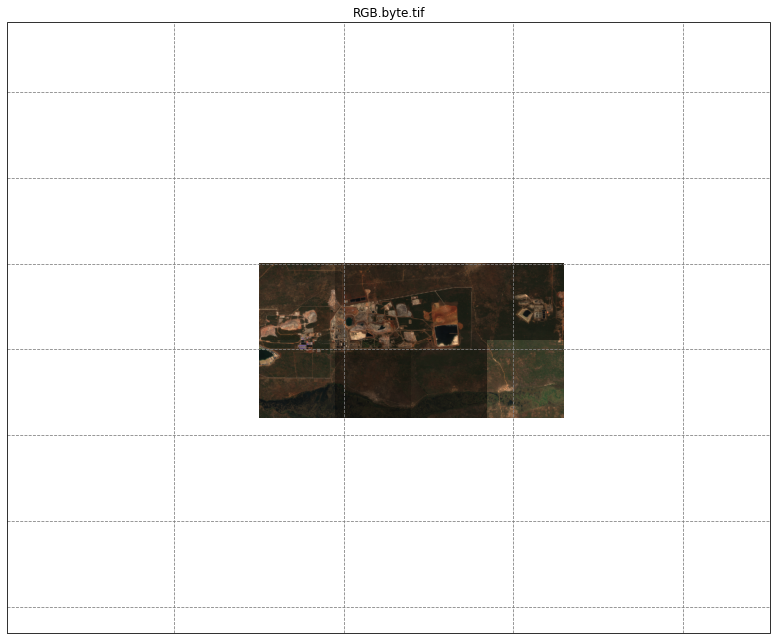

In [7]:
geod = ccrs.Geodetic()
#not completely sure which projection
## google earth engine uses mercator while S2 uses UTM
## both look accurate, but mercator is easier to use because of the zone restrictions in UTM
proj = ccrs.Mercator(central_longitude=0.0, min_latitude=-80.0, max_latitude=84.0, globe=None, latitude_true_scale=0.0)
#proj = ccrs.UTM(zone=35, southern_hemisphere=True, globe=None)
plt.figure(figsize=(16,9))
#bigger picture - mercator
#ease_extent = [2600000., 3300000., -1500000., -1000000.]
#narrowed in - mercator
ease_extent = [2850000., 2900000., -1220000., -1180000.]
#whole zone 35 - UTM
#ease_extent = [-250000.0, 1250000.0, -10000000.0, 25000000.0]
#narrowed in 35 - UTM
#ease_extent = [360000., 390000., 8800000, 8815000.0]

ax = plt.axes(projection=proj)
ax.set_extent(ease_extent, crs=proj)

def images_prep(start, end):
    image_list = []
    num = start
    while num <=end:
        tiff = rasterio.open(r"C:\Users\e.nason\Downloads\ee_multi_export_test\region_ex_"+str(num)+".tif")
        b = tiff.bounds
        im = tiff.read()
        im = np.transpose(im, [1,2,0])
        maxValue = np.amax(im)
        im = im/np.amax(im)
        im = np.clip(im, 0, 1)
        image_list.append((im, b))
        num = num+1
    return image_list 

def image_bounds(im_single):
    #last = len(im_list) - 1
    
    xul, yul = proj.transform_point(
        x = im_single[0],
        y = im_single[1],
        src_crs = geod)

    xlr, ylr = proj.transform_point(
        x = im_single[2],
        y = im_single[3],
        src_crs = geod)
    extent = [xul, xlr, yul, ylr]
    return extent

images = images_prep(1, 8)

###### Bigger Image For Context ######
# tiff_big = rasterio.open(r"C:\Users\e.nason\Downloads\big_region.tif")
# region_coords = tiff_big.bounds
# im_big = tiff_big.read()
# im_big = np.transpose(im_big, [1,2,0])
# im_big = im_big/np.amax(im_big)
# im_big = np.clip(im_big, 0, 1)

# xul2, yul2 = proj.transform_point(
#     x = region_coords[0],
#     y = region_coords[1],
#     src_crs = geod)

# xlr2, ylr2 = proj.transform_point(
#     x = region_coords[2],
#     y = region_coords[3],
#     src_crs = geod)
# extent_big = [xul2, xlr2, yul2, ylr2]
    
# ax.imshow(im_big, extent=extent_big, transform=proj, origin='upper')
######################################

for image, b in images:
    ax.imshow(image, extent=image_bounds(b), transform=proj, origin='upper')

ax.gridlines(color='gray', linestyle='--')
ax.coastlines()
ax.add_feature(cf.BORDERS)

plt.title('RGB.byte.tif')

plt.tight_layout()

# which projection?
# look into simplified export/import methods - currently exporting to new folder in google drive, downloading the folder manually, and importing all images in folder
## export directly to computer? import from drive or cloud?
## also integrate export process into this file (or vice versa) - easy task